### In this notebook, we generate a 3D synthetic volume with a randomized mesh network of tubular objects. 


Code writer: Hyoungjun Park 

Contact: peterpark828@icloud.com OR peterpark828@kaist.ac.kr

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import os
import math
import sys

from tifffile import imsave
import scipy.ndimage as ndimage
import scipy.signal as signal
%matplotlib inline
from skimage.draw import line_nd
from skimage.draw import line_aa
from skimage.draw import line

import elasticdeform
import os

In [2]:
def normalize(img_np, invert=False):
    img_min = np.min(img_np)
    img_max = np.max(img_np)

    new_min = 0
    new_max = 1
    img_normd = (img_np - img_min) * ((new_max - new_min) / (img_max - img_min)) + new_min

    if invert:
        img_normd = new_max - img_normd

    return img_normd

----

Set parameters. 

In [3]:
std = 4 # std of Gaussian blurring 
ROI_size = 900 # dimension of the synthetic volume per axis. 
object_num = 10000 # number of objects for lines 

sigma_=3 #deformation parameter
points_=70 #deformation parameter

Save directory. 

In [4]:
parent_dir = 'neuroclear/simulation_test/'
if not os.path.isdir(parent_dir):
    os.makedirs(parent_dir)

psf_file_name = '10000-lines-blurred-by-gaublur-std-' +str(std)
model = 'haystack'
save_dir = os.path.join(parent_dir, 'simulation_data/', model, psf_file_name)

Save directory for before-deformation.

In [5]:
save_before_deform_dir = os.path.join(save_dir, 'before_deform')
print(save_before_deform_dir)
if not os.path.isdir(save_before_deform_dir):
    os.makedirs(save_before_deform_dir)

/mnt/eislabor/simulation_test/simulation_data/haystack/10000-lines-blurred-by-gaublur-std-4/before_deform


Save directory for Ground-truth

In [6]:
GT_deform_dir = os.path.join(save_dir, 'GT')
print(GT_deform_dir)
if not os.path.isdir(GT_deform_dir):
    os.makedirs(GT_deform_dir)

/mnt/eislabor/simulation_test/simulation_data/haystack/10000-lines-blurred-by-gaublur-std-4/GT


Save dirtecotry for Blurring 

In [7]:
blurred_deform_dir = os.path.join(save_dir, 'blurred')

if not os.path.isdir(blurred_deform_dir):
    os.makedirs(blurred_deform_dir)

Save dirtecotry for Blurring after 90-degree rotation. 

In [8]:
blurred_xz_deform_dir = os.path.join(save_dir, 'rotated_xz_blurred')

print(blurred_xz_deform_dir)
if not os.path.isdir(blurred_xz_deform_dir):
    os.makedirs(blurred_xz_deform_dir)

/mnt/eislabor/simulation_test/simulation_data/haystack/10000-lines-blurred-by-gaublur-std-4/rotated_xz_blurred


Test drawing one random line. 

In [9]:
start_x = np.random.randint(0,ROI_size)
end_x = np.random.randint(0, ROI_size)
start_y = np.random.randint(0,ROI_size)
end_y = np.random.randint(0, ROI_size)

In [10]:
line_pts = line_aa(start_x, end_x, start_y, end_y)

In [11]:
canvas = np.zeros((ROI_size,ROI_size))

In [12]:
for i in range(len(line_pts[0])):
    canvas[line_pts[0][i], line_pts[1][i]] = 100

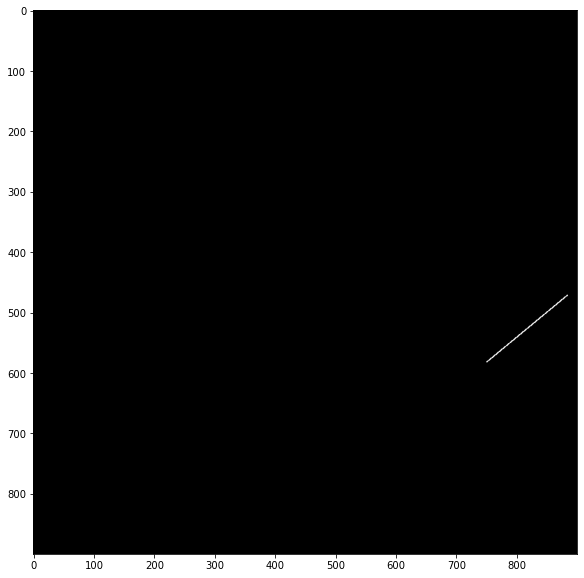

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(canvas, cmap = 'gray')

In [14]:
canvas = np.zeros((ROI_size,ROI_size))

In [15]:
for t in range(20):
    start_x = np.random.randint(0,ROI_size)
    end_x = np.random.randint(0, ROI_size)
    start_y = np.random.randint(0,ROI_size)
    end_y = np.random.randint(0, ROI_size)
    
    line_pts = line_aa(start_x, end_x, start_y, end_y)
    
    for i in range(len(line_pts[0])):
        canvas[line_pts[0][i], line_pts[1][i]] = 100


Test deformation. 

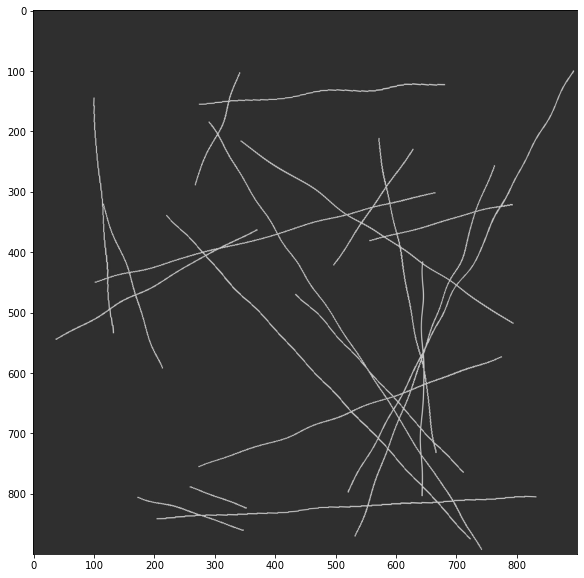

In [16]:
plt.figure(figsize=(10,10))
# X = np.zeros((200, 300))
# X[::10, ::10] = 1
# apply deformation with a random 3 x 3 grid
canvas_vol = elasticdeform.deform_random_grid(canvas, sigma=2, points=20)
plt.imshow(canvas_vol, cmap = 'gray')

## Now, 3D volume with random lines

In [17]:
start_x = np.random.randint(0,ROI_size)
end_x = np.random.randint(0, ROI_size)

start_y = np.random.randint(0,ROI_size)
end_y = np.random.randint(0, ROI_size)

start_z =  np.random.randint(0, ROI_size)
end_z =  np.random.randint(0, ROI_size)

In [18]:
canvas_vol = np.zeros((ROI_size, ROI_size, ROI_size))

In [19]:
for t in range(object_num):
    indice = [np.random.randint(0, ROI_size) for i in range(6)]
    
    start_pt, end_pt = indice[:3], indice[3:]
    
    line_pts = line_nd(start_pt, end_pt) 

    for i in range(len(line_pts[0])):
        canvas_vol[line_pts[0][i], line_pts[1][i], line_pts[2][i]] = (2**16-1)*(2/3)    

### Slice

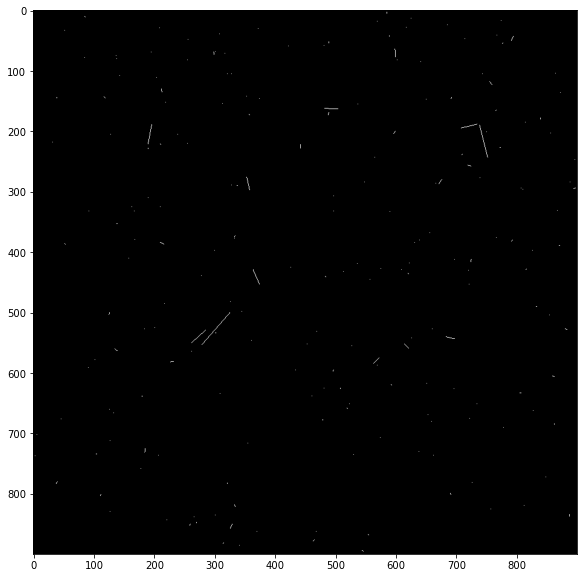

In [20]:
plt.figure(figsize=(10,10))
# X = np.zeros((200, 300))
# X[::10, ::10] = 1
# apply deformation with a random 3 x 3 grid
plt.imshow(canvas_vol[10], cmap = 'gray')

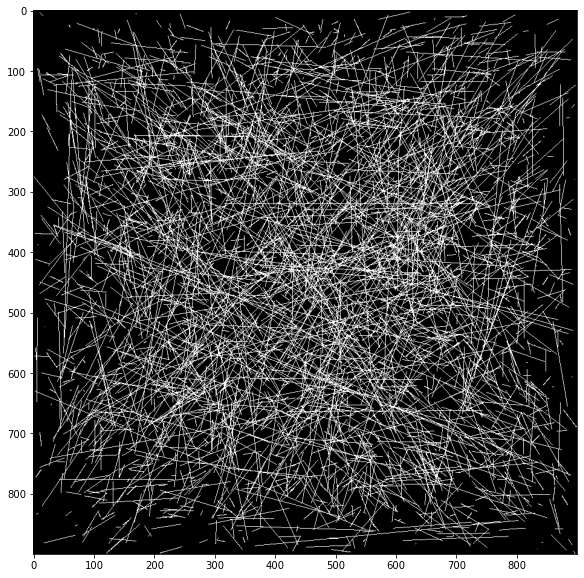

In [21]:
plt.figure(figsize=(10,10))
# X = np.zeros((200, 300))
# X[::10, ::10] = 1
# apply deformation with a random 3 x 3 grid
plt.imshow(np.amax(canvas_vol[100:150],0), cmap = 'gray')

## Try convolving with 3D Gaussian or average filter to make the lines thicker. 

In [22]:
from scipy import ndimage, misc

In [23]:
canvas_vol = ndimage.uniform_filter(canvas_vol, size=2)

In [24]:
canvas_vol[canvas_vol>100] = (2**16-1)*(2/3)

In [25]:
canvas_vol[canvas_vol<100] = 0

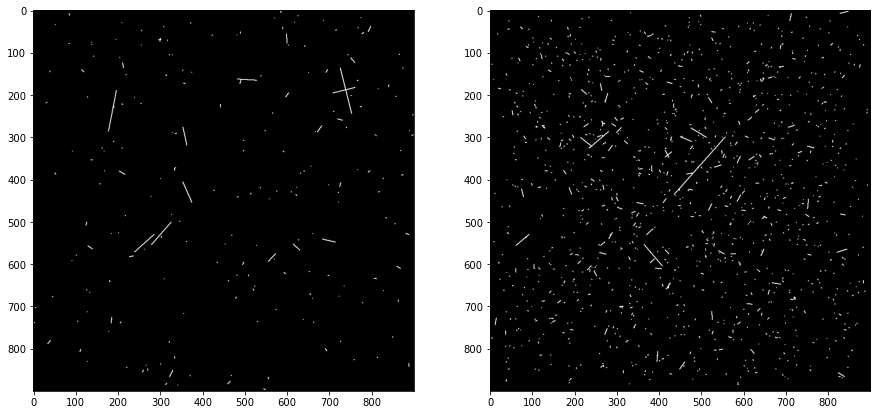

<Figure size 720x720 with 0 Axes>

In [26]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(canvas_vol[10], cmap = 'gray')
axs[1].imshow(canvas_vol[60], cmap = 'gray')

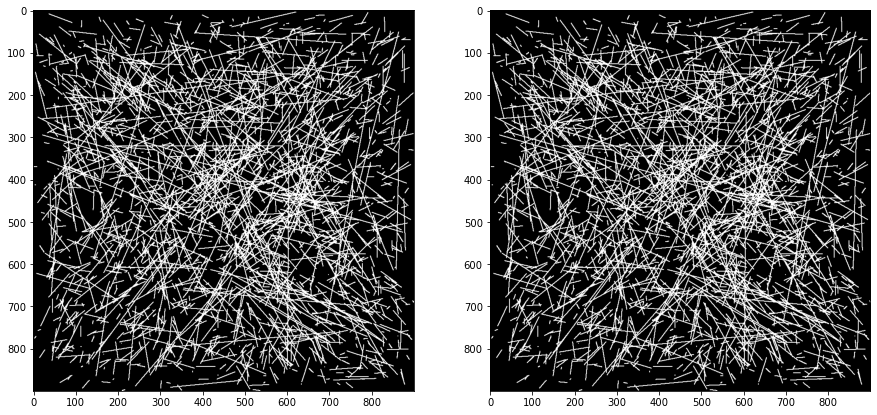

<Figure size 720x720 with 0 Axes>

In [27]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(np.amax(canvas_vol[80:110],0), cmap = 'gray')
axs[1].imshow(np.amax(canvas_vol[80:110],0), cmap = 'gray')

In [28]:
canvas_vol_save = canvas_vol.astype(np.uint16)

In [29]:
std=4

In [31]:
imsave(save_before_deform_dir + '/before_deform.tiff', canvas_vol_save)

------

### Deform

In [32]:
canvas_vol = elasticdeform.deform_random_grid(canvas_vol, sigma=sigma_, points=points_)

In [33]:
np.min(canvas_vol), np.max(canvas_vol)

(-23554.7170325301, 74732.5466487551)

In [34]:
canvas_vol = np.clip(canvas_vol, 0, None)

In [35]:
np.min(canvas_vol), np.max(canvas_vol)

(0.0, 74732.5466487551)

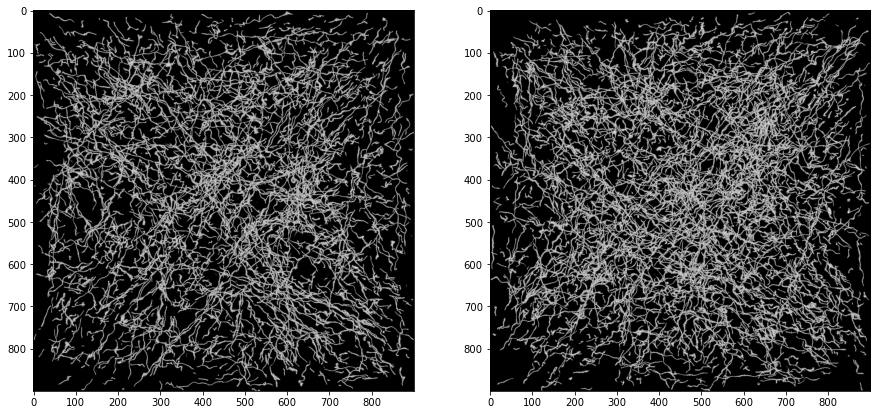

<Figure size 720x720 with 0 Axes>

In [36]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(np.amax(canvas_vol[80:110],0), cmap = 'gray')
axs[1].imshow(np.amax(canvas_vol[110:140],0), cmap = 'gray')

### Save this as GT. 

In [37]:
canvas_vol_save = (canvas_vol-np.mean(canvas_vol))/np.std(canvas_vol)
canvas_vol_save = normalize(canvas_vol_save) * (2**16-1)
canvas_vol_save = canvas_vol_save.astype(np.uint16)

In [38]:
imsave(GT_deform_dir + '/GT.tiff', canvas_vol_save)

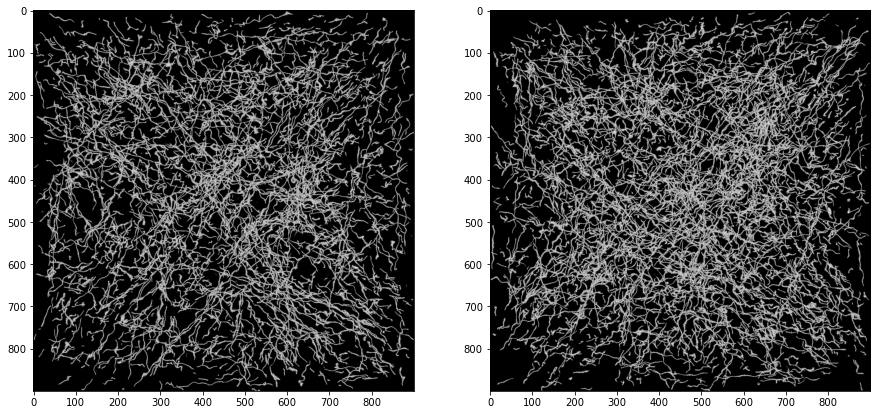

<Figure size 720x720 with 0 Axes>

In [39]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(np.amax(canvas_vol_save[80:110],0), cmap = 'gray')
axs[1].imshow(np.amax(canvas_vol_save[110:140],0), cmap = 'gray')

----

# Convolve with Z-Gaussian 

In [40]:
canvas_vol = (canvas_vol-np.mean(canvas_vol))/np.std(canvas_vol)

In [41]:
canvas_vol = normalize(canvas_vol)

In [42]:
fitler_size = 31

In [43]:
gau_filter_ = signal.gaussian(fitler_size,std)
# gau_filter_ = np.reshape(gau_filter_, (1,31))

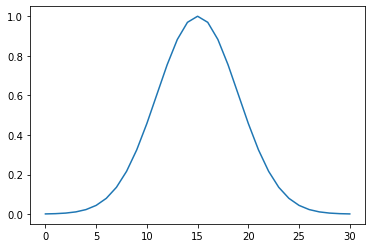

In [44]:
plt.figure()
plt.plot(gau_filter_.squeeze())

In [45]:
gau_filter = np.zeros((fitler_size,fitler_size,fitler_size))

In [46]:
middle = int(gau_filter_.shape[0]/2)
print(middle)
gau_filter[:,middle,middle] = gau_filter_

15


In [47]:
canvas_vol_blurred = signal.fftconvolve(canvas_vol, gau_filter, mode='same')

In [48]:
canvas_vol_blurred_save = (canvas_vol_blurred-np.mean(canvas_vol_blurred))/np.std(canvas_vol_blurred)
canvas_vol_blurred_save = normalize(canvas_vol_blurred_save) * (2**16-1)
canvas_vol_blurred_save = canvas_vol_blurred_save.astype(np.uint16)

Slice XY image comparison 

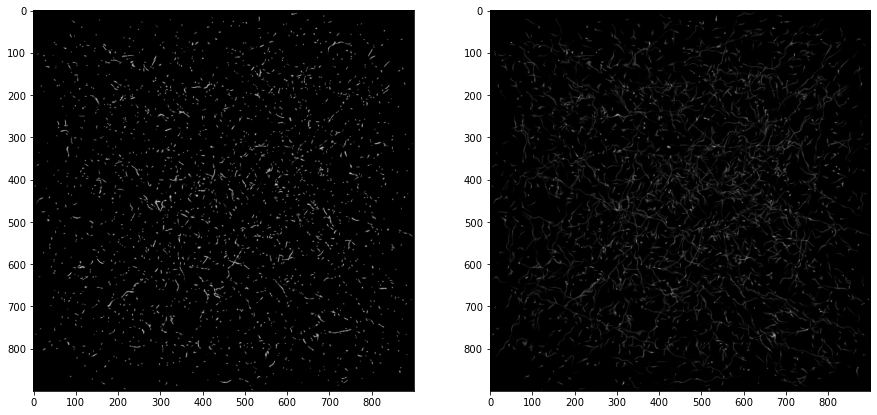

<Figure size 720x720 with 0 Axes>

In [49]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(canvas_vol[110], cmap = 'gray')
axs[1].imshow(canvas_vol_blurred[110], cmap = 'gray')

Slice XZ image comparison 

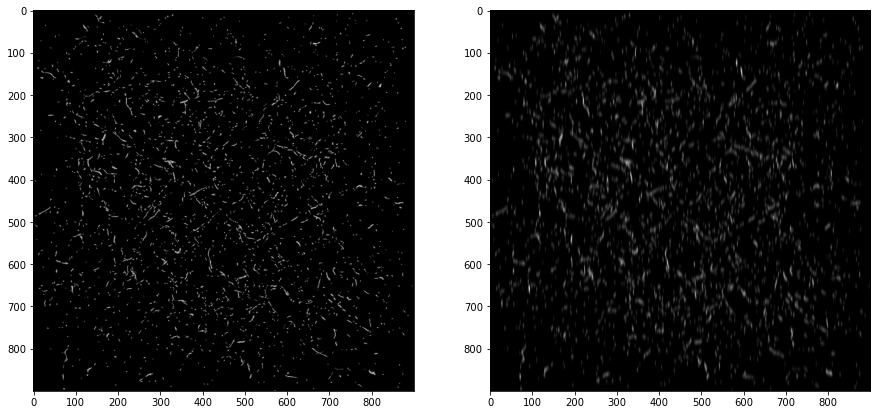

<Figure size 720x720 with 0 Axes>

In [50]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(canvas_vol[:,110,:], cmap = 'gray')
axs[1].imshow(canvas_vol_blurred[:,110,:], cmap = 'gray')

MIP XY image comparison 

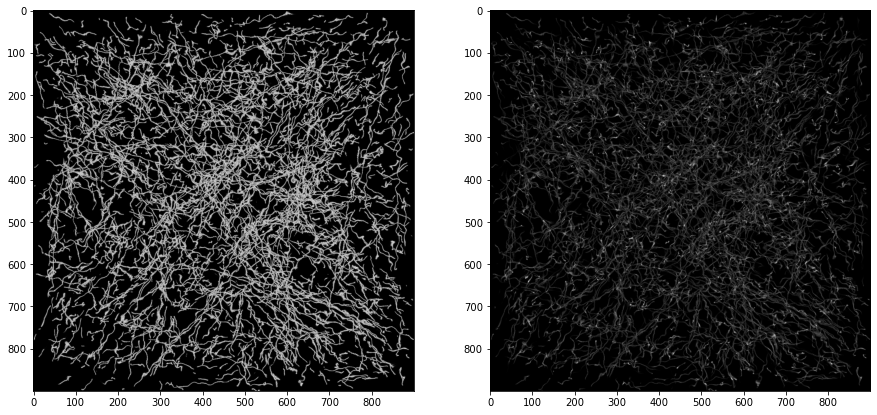

<Figure size 720x720 with 0 Axes>

In [51]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(np.amax(canvas_vol[80:110],0), cmap = 'gray')
axs[1].imshow(np.amax(canvas_vol_blurred[80:110],0), cmap = 'gray')

MIP XZ image comparison

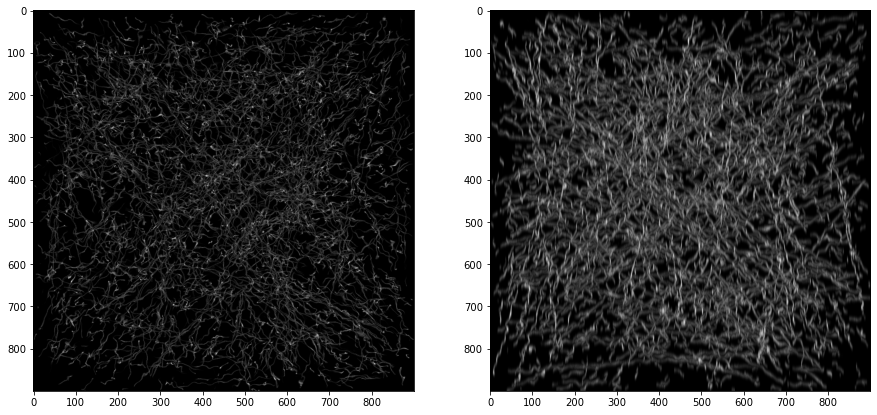

<Figure size 720x720 with 0 Axes>

In [52]:
figs, axs = plt.subplots(1,2,figsize=(15,15))
figs = plt.figure(figsize=(10,10))
axs[0].imshow(np.amax(canvas_vol_blurred_save[80:110,:,:],0), cmap = 'gray')
axs[1].imshow(np.amax(canvas_vol_blurred_save[:,80:110,:],1), cmap = 'gray')

In [53]:
imsave(blurred_deform_dir + '/blurred.tiff', canvas_vol_blurred_save)

### Create the blurred volume after rotation (for comparison). 

In [54]:
canvas_vol_rotated_xz = np.swapaxes(canvas_vol, 0,1) # (z,y,x) -> (y,z,x)
canvas_vol_rotated_xz = signal.fftconvolve(canvas_vol_rotated_xz, gau_filter, mode='same')

In [55]:
canvas_vol_rotated_xz_save = (canvas_vol_rotated_xz-np.mean(canvas_vol_rotated_xz))/np.std(canvas_vol_rotated_xz)
canvas_vol_rotated_xz_save = normalize(canvas_vol_rotated_xz_save) * (2**16-1)
canvas_vol_rotated_xz_save = canvas_vol_rotated_xz_save.astype(np.uint16)

In [56]:
imsave(blurred_xz_deform_dir+'/rotated_xz_blurred.tiff', canvas_vol_rotated_xz_save)